In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
train_data = pd.read_csv('./data/application_train.csv')

train_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [71]:
test_data = pd.read_csv('./data/application_test.csv')

test_data.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [72]:
train_data['CODE_GENDER'].describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

count    307507.000000
mean          0.341648
std           0.474263
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: CODE_GENDER, dtype: float64


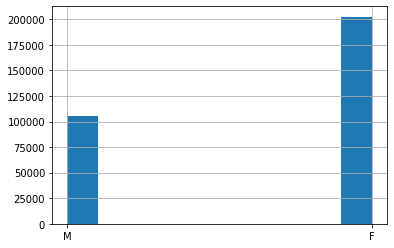

In [73]:
train_data = train_data.drop(train_data[(train_data['CODE_GENDER'] != 'M') & (train_data['CODE_GENDER'] != 'F')].index)
train_data['CODE_GENDER'].hist()
train_data['CODE_GENDER'].replace('F',0,inplace=True)
train_data['CODE_GENDER'].replace('M',1,inplace=True)
test_data['CODE_GENDER'].replace('F',0,inplace=True)
test_data['CODE_GENDER'].replace('M',1,inplace=True)
print(train_data['CODE_GENDER'].describe())

count     307507
unique         2
top            N
freq      202922
Name: FLAG_OWN_CAR, dtype: object


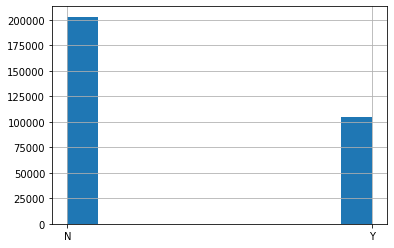

In [74]:
print(train_data['FLAG_OWN_CAR'].describe())
train_data['FLAG_OWN_CAR'].hist()
train_data['FLAG_OWN_CAR'].replace('N',0,inplace=True)
train_data['FLAG_OWN_CAR'].replace('Y',1,inplace=True)
test_data['FLAG_OWN_CAR'].replace('N',0,inplace=True)
test_data['FLAG_OWN_CAR'].replace('Y',1,inplace=True)


count     307507
unique         2
top            Y
freq      213308
Name: FLAG_OWN_REALTY, dtype: object


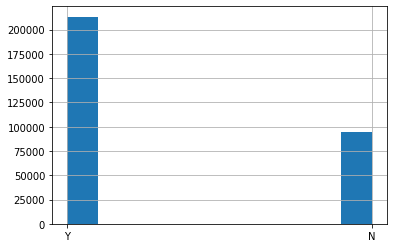

In [75]:
print(train_data['FLAG_OWN_REALTY'].describe())
train_data['FLAG_OWN_REALTY'].hist()

train_data['FLAG_OWN_REALTY'].replace('N',0,inplace=True)
train_data['FLAG_OWN_REALTY'].replace('Y',1,inplace=True)
test_data['FLAG_OWN_REALTY'].replace('N',0,inplace=True)
test_data['FLAG_OWN_REALTY'].replace('Y',1,inplace=True)

In [76]:
unique = train_data['NAME_CONTRACT_TYPE'].unique()
unique_labels = dict(zip(unique, range(len(unique))))
print(unique_labels)

{'Cash loans': 0, 'Revolving loans': 1}


count         307507
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object


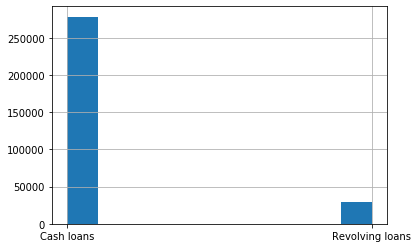

In [77]:
train_data['NAME_CONTRACT_TYPE'].hist()
print(train_data['NAME_CONTRACT_TYPE'].describe())
train_data=train_data.applymap(lambda s: unique_labels.get(s) if s in unique_labels else s)
test_data=test_data.applymap(lambda s: unique_labels.get(s) if s in unique_labels else s)

count            306215
unique                7
top       Unaccompanied
freq             248523
Name: NAME_TYPE_SUITE, dtype: object
{'Unaccompanied': 0, 'Family': 1, 'Spouse, partner': 2, 'Children': 3, 'Other_A': 4, nan: 5, 'Other_B': 6, 'Group of people': 7}


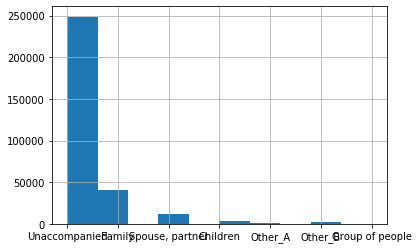

In [78]:
train_data['NAME_TYPE_SUITE'].hist()
print(train_data['NAME_TYPE_SUITE'].describe())
unique = train_data['NAME_TYPE_SUITE'].unique()
unique_labels = dict(zip(unique, range(len(unique))))
print(unique_labels)
train_data=train_data.applymap(lambda s: unique_labels.get(s) if s in unique_labels else s)
test_data=test_data.applymap(lambda s: unique_labels.get(s) if s in unique_labels else s)

count      307507
unique          8
top       Working
freq       158771
Name: NAME_INCOME_TYPE, dtype: object
{'Working': 0, 'State servant': 1, 'Commercial associate': 2, 'Pensioner': 3, 'Unemployed': 4, 'Student': 5, 'Businessman': 6, 'Maternity leave': 7}


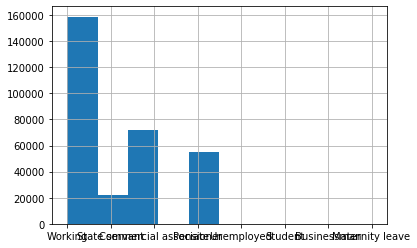

In [79]:
train_data['NAME_INCOME_TYPE'].hist()
print(train_data['NAME_INCOME_TYPE'].describe())
unique = train_data['NAME_INCOME_TYPE'].unique()
unique_labels = dict(zip(unique, range(len(unique))))
print(unique_labels)
train_data=train_data.applymap(lambda s: unique_labels.get(s) if s in unique_labels else s)
test_data=test_data.applymap(lambda s: unique_labels.get(s) if s in unique_labels else s)

count                            307507
unique                                5
top       Secondary / secondary special
freq                             218389
Name: NAME_EDUCATION_TYPE, dtype: object
{'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4}


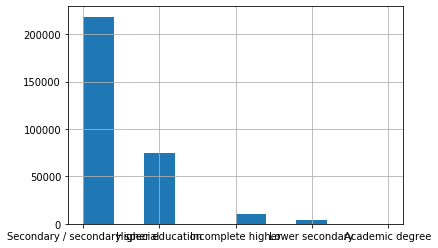

In [80]:
train_data['NAME_EDUCATION_TYPE'].hist()
print(train_data['NAME_EDUCATION_TYPE'].describe())
unique = train_data['NAME_EDUCATION_TYPE'].unique()
unique_labels = dict(zip(unique, range(len(unique))))
print(unique_labels)
train_data=train_data.applymap(lambda s: unique_labels.get(s) if s in unique_labels else s)
test_data=test_data.applymap(lambda s: unique_labels.get(s) if s in unique_labels else s)

count                307507
unique                    6
top       House / apartment
freq                 272865
Name: NAME_HOUSING_TYPE, dtype: object
{'House / apartment': 0, 'Rented apartment': 1, 'With parents': 2, 'Municipal apartment': 3, 'Office apartment': 4, 'Co-op apartment': 5}


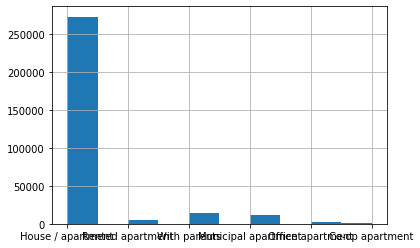

In [81]:
train_data['NAME_HOUSING_TYPE'].hist()
print(train_data['NAME_HOUSING_TYPE'].describe())
unique = train_data['NAME_HOUSING_TYPE'].unique()
unique_labels = dict(zip(unique, range(len(unique))))
print(unique_labels)
train_data=train_data.applymap(lambda s: unique_labels.get(s) if s in unique_labels else s)
test_data=test_data.applymap(lambda s: unique_labels.get(s) if s in unique_labels else s)

In [82]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [83]:
# Missing values statistics
missing_values = missing_values_table(train_data)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 61 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MODE                   214862               69.9
COMMONAREA_MEDI                   214862               69.9
COMMONAREA_AVG                    214862               69.9
NONLIVINGAPARTMENTS_MODE          213512               69.4
NONLIVINGAPARTMENTS_AVG           213512               69.4
NONLIVINGAPARTMENTS_MEDI          213512               69.4
LIVINGAPARTMENTS_MEDI             210197               68.4
LIVINGAPARTMENTS_AVG              210197               68.4
LIVINGAPARTMENTS_MODE             210197               68.4
FLOORSMIN_MEDI                    208640               67.8
FLOORSMIN_MODE                    208640               67.8
FLOORSMIN_AVG                     208640               67.8
YEARS_BUILD_AVG                   204486               66.5
YEARS_BUILD_MODE                  204486               66.5
YEARS_BUILD_MEDI                  204486               66.5
OWN_CAR_AGE                       202927               66.0
LANDAREA_MEDI                     182588               59.4
LANDAREA_MODE                     182588               59.4
LANDAREA_AVG                      182588               59.4
BASEMENTAREA_MODE                 179942               58.5

In [84]:
print(f'Train shape before = {train_data.shape}')
test_data = test_data.drop(list(missing_values[missing_values['% of Total Values']>50].index),axis=1)
train_data = train_data.drop(list(missing_values[missing_values['% of Total Values']>50].index),axis=1)
print(f'Train shape after = {train_data.shape}')

Train shape before = (307507, 122)
Train shape after = (307507, 84)


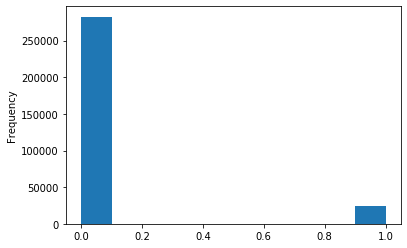

In [85]:
train_labels = train_data['TARGET']
train_labels.astype(int).plot.hist()

In [86]:
non_floats = []
for col in train_data:
    if not pd.api.types.is_numeric_dtype(train_data[col]):
        non_floats.append(col)
train_data = train_data.drop(columns=non_floats)
test_data = test_data.drop(columns=non_floats)
train_data.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 0                 0   
4  ...                 0                 0                 0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                         0.0                        0.0   
1                 0                         0.0                        0.0   
2                 0                         0.0                        0.0   
3                 0                         NaN                        NaN   
4                 0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 76 columns]

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

if 'TARGET' in train_data:
    train = train_data.drop(columns = ['TARGET'])
else:
    train = train_data.copy()
    
features = list(train.columns)

test = test_data.copy()


scaler = MinMaxScaler(feature_range = (0, 1))

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test_data)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307507, 75)
Testing data shape:  (48744, 75)


In [88]:

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 250,min_samples_split=4, random_state = 25, verbose = 1, n_jobs = -1)


In [89]:
random_forest.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=1,
                       warm_start=False)

In [90]:
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    2.2s finished


In [92]:
submit = test_data[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('submission.csv', index=False)
submit.head()

SK_ID_CURR    TARGET
0      100001  0.166648
1      100005  0.198038
2      100013  0.082800
3      100028  0.093524
4      100038  0.172276